Enter degree of polynomial: 2
Enter coefficient of x^2: 1
Enter coefficient of x^1: 1
Enter coefficient of x^0: 1
Enter lower limit: 1
Enter upper limit: 3
n  is no. of subintervals 
For Simpson menthod ,enter n(must be even): 4
Area using Simpson 1/3rd rule:  14.6666666667
For Trapezoidal menthod ,enter n: 45
Area using Trapezoidal rule:  14.6673251029
Actual area:  14.6666666667


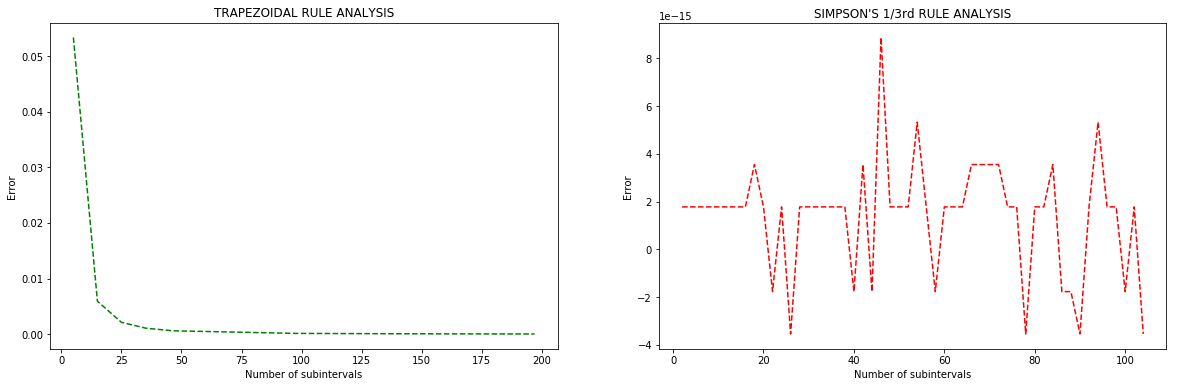

In [310]:
from scipy.integrate import quad
from matplotlib import pyplot as plt
import numpy as np


def poly(x, arr):
    ans = 0
    for i in range(len(arr)):
        ans += arr[i] * pow(x, i)
    return ans


def simpson(a, b, n, arr):
    h = (b - a) / float(n)
    sections = n
    apx = 0.0
    for i in range(1, sections):
        x = a + h * i
        if i % 2 == 0:
            apx += 2 * poly(x, arr)
        else:
            apx += 4 * poly(x, arr)

    apx += poly(a, arr) + poly(b, arr)
    return apx * h / 3.0


def trapezoidal(a, b, n, arr):
    h = (b - a) / float(n)
    sections = n
    apx = 0.0

    for i in range(1, sections):
        x = a + h * i
        apx += 2 * poly(x, arr)

    apx += poly(a, arr) + poly(b, arr)
    return apx * h / 2.0


######### MAIN START ########################
if __name__ == "__main__":
    ######## Taking input of Polynomial ##################
    degree = int(raw_input("Enter degree of polynomial: "))
    arr = [1] * (degree + 1)
    for i in range(0, degree + 1):
        arr[degree -
            i] = int(raw_input("Enter coefficient of x^{}: ".format(degree - i)))
    a = float(raw_input("Enter lower limit: "))
    b = float(raw_input("Enter upper limit: "))

    ############## Simpson's 1/3rd rule ##########################
    n = int(raw_input("n  is no. of subintervals \nFor Simpson menthod ,enter n(must be even): "))
    print "Area using Simpson 1/3rd rule: ", simpson(a, b, n, arr)

    ######### To analyse simpson's rule getting area at various points ##############
    n_simpson = []
    area_simpson = []
    sections = n
    while(n > sections - 10 and n > 0):
        n_simpson.append(n)
        n -= 2
    n = sections + 2
    while(n <= sections + 100):
        n_simpson.append(n)
        n += 2
    n_simpson.sort()
    for i in n_simpson:
        area_simpson.append(simpson(a, b, i, arr))

    ############## Trapezoidal rule ##########################
    n = int(raw_input("For Trapezoidal menthod ,enter n: "))
    print "Area using Trapezoidal rule: ", trapezoidal(a, b, n, arr)

    ######### To analyse trapezoidal's rule getting area at various points ##############
    n_trapezoidal = []
    area_trapezoidal = []
    sections = n
    while(n > sections - 100 and n > 0):
        n_trapezoidal.append(n)
        n -= 10
    n = sections + 2
    while(n <= sections + 200):
        n_trapezoidal.append(n)
        n += 50
    n_trapezoidal.sort()
    for i in n_trapezoidal:
        area_trapezoidal.append(trapezoidal(a, b, i, arr))

    I = quad(poly, a, b, args=arr)
    print "Actual area: ", I[0]

    area_trapezoidal = np.array(area_trapezoidal, dtype=float)
    area = np.full((1, len(n_trapezoidal)), I[0], dtype=float)
    area_diff_trapezoidal = area[0] - area_trapezoidal
    area_diff_trapezoidal = np.absolute(area_diff_trapezoidal)

    area_simpson = np.array(area_simpson, dtype=float)
    area = np.full((1, len(n_simpson)), I[0], dtype=float)
    area_diff_simpson = area[0] - area_simpson
    # area_diff_simpson = np.absolute(area_diff_simpson)

    ########### plotting error v/s number of subintervals ##########
    plt.close()
    plt.figure(figsize=(20, 6))
    plt.subplot(121)
    plt.plot(n_trapezoidal, area_diff_trapezoidal, 'g--')
    plt.title("TRAPEZOIDAL RULE ANALYSIS")
    plt.xlabel('Number of subintervals')
    plt.ylabel('Error')
    plt.subplot(122)
    plt.plot(n_simpson, area_diff_simpson, 'r--')
    plt.title("SIMPSON'S 1/3rd RULE ANALYSIS")
    plt.xlabel('Number of subintervals')
    plt.ylabel('Error')
    plt.show()


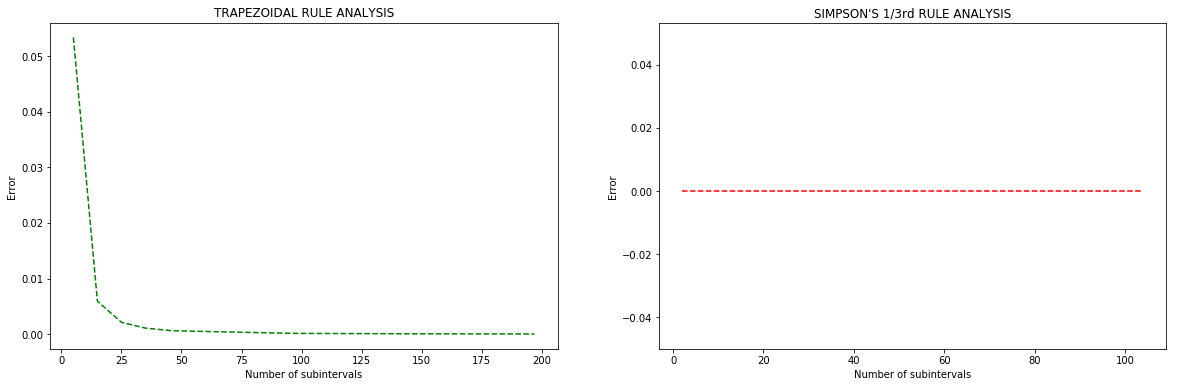

In [321]:
plt.close()
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.plot(n_trapezoidal, area_diff_trapezoidal, 'g--')
plt.title("TRAPEZOIDAL RULE ANALYSIS")
plt.xlabel('Number of subintervals')
plt.ylabel('Error')
plt.subplot(122)
plt.plot(n_simpson, area_diff_simpson, 'r--')
plt.title("SIMPSON'S 1/3rd RULE ANALYSIS")
plt.ylim(area_diff_trapezoidal[-1]-0.05, area_diff_trapezoidal[0])
plt.xlabel('Number of subintervals')
plt.ylabel('Error')
plt.show()

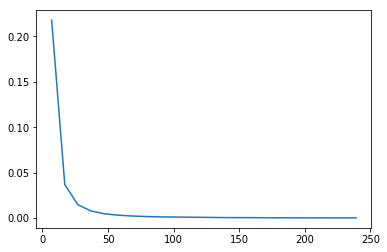

In [283]:
plt.plot(tr[:,0],tr[:,1])
plt.show()    

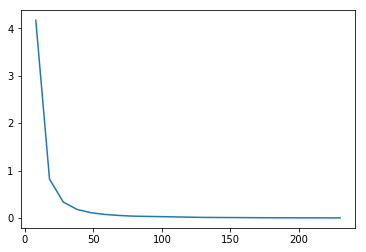

In [275]:
import numpy as np
area_trapezoidal = np.array(area_trapezoidal,dtype=float)

area = np.full((1,len(n_trapezoidal)),I[0],dtype=float)

area_diff_trapezoidal = area[0] - area_trapezoidal

area_diff_trapezoidal = np.absolute(area_diff_trapezoidal)

tr = np.column_stack((n_trapezoidal,area_diff_trapezoidal))

n_trapezoidal
tr = tr[tr[:,0].argsort()]

plt.close()
plt.plot(tr[:,0],tr[:,1])
plt.show()

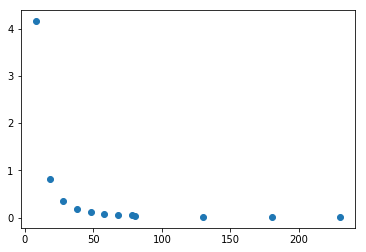

In [211]:
plt.scatter(n_trapezoidal, area_diff)
plt.scatter(n_simpson, area_simpson)

In [210]:
plt.clf()
plt.show()


In [ ]:
n = int(raw_input("For Simpson menthod ,enter n(must be even): "))
simpson(n)

In [105]:

    degree = int(raw_input("Enter degree of polynomial: "))
    arr = [1]*(degree+1)
    for i in range(0,degree+1):
        arr[degree-i] = int(raw_input( "Enter coefficient of x^{}: ".format(degree-i)))
    
    a = float(raw_input("Enter a: "))
    b = float(raw_input("Enter b: "))
    h = (b-a)/float(sections)
    
    apx = 0.0
    def poly(x):
        ans = 0
        for i in range(len(arr)):
            ans += arr[i]*pow(x,i)
        return ans
    
    for i in range(1,sections):
        x = a + h*i
        apx += 2*poly(x)
    
    apx += poly(a) + poly(b)
    
    print apx*h/2.0

In [120]:
n = int(raw_input("Enter n(must be even): "))
trapezoidal(n)

Enter n(must be even): 700
Enter degree of polynomial: 4
Enter coefficient of x^4: 3
Enter coefficient of x^3: 2
Enter coefficient of x^2: 3
Enter coefficient of x^1: 1
Enter coefficient of x^0: 9
Enter a: 2
Enter b: 8
22269.6394531


In [112]:
from scipy.integrate import quad

In [117]:
def integration():
    degree = int(raw_input("Enter degree of polynomial: "))
    arr = [1]*(degree+1)
    for i in range(0,degree+1):
        arr[degree-i] = int(raw_input( "Enter coefficient of x^{}: ".format(degree-i)))
    
    a = float(raw_input("Enter a: "))
    b = float(raw_input("Enter b: "))
#     h = (b-a)/float(sections)
    
    apx = 0.0
    def poly(x):
        ans = 0
        for i in range(len(arr)):
            ans += arr[i]*pow(x,i)
        return ans
    I = quad(poly, a, b)
    print I

In [119]:
integration()

Enter degree of polynomial: 4
Enter coefficient of x^4: 3
Enter coefficient of x^3: 2
Enter coefficient of x^2: 3
Enter coefficient of x^1: 1
Enter coefficient of x^0: 9
Enter a: 2
Enter b: 8
(22269.599999999995, 2.472422266919238e-10)
